<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Orig_Lab5_SurveyDataAnalysisPew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Analysis of Pew Research Survey Data

This is a public opinion data source that lends itself to all sorts of timely questions about religion and politics. This is the kind of thing that you could do on the research project if you were interested in attitudes about science and technology (and could find an appropriate dataset).


In [2]:
# Code block 1ab: Installing some libraries we'll need
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.6 MB/s eta 0:00:00


In [3]:
# Code block 1b: Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt
import researchpy as rp
from pandas.api.types import CategoricalDtype

You can download the data from the Pew Center, https://www.pewresearch.org/science/datasets/ and then copy the files to your Drive and read the data into your notebook.

I'm using the American Trends Panel Wave 55 here. Panel study is one done repeatedly to monitor changes in trends. The data download includes a codebook for the survey, in this case, a file named ATP W55 topline.pdf. For your convenience, I've linked to it here: https://www.dropbox.com/s/o799oggh6ii17r5/ATP%20W55%20topline.pdf?dl=0

Here's a general codebook for the ATP data that is useful for identifying demographic variables to use in the analysis. (These are variables that are included in all of the waves of ATP.) https://www.dropbox.com/s/qe4fsmbq1fvr76i/Codebook-and-instructions-for-working-with-ATP-data.pdf?dl=0

We'll use the codebook to find some variables of interest and then do some basic analysis and visualization.

In [4]:
# Code block 2: Reading in data
# The format of this data source is an SPSS data file, .sav, so we installed a library--pyreadstat--that extends pandas
# by adding another read method, read_spss. We use this to read the SPSS file into a new data object.
# I mounted my Drive in this notebook and read the file by copying the local path.

ATPW55_df = pd.read_spss('ATP W55.sav')

### Both SPSS & STATA combine numeric representation of data & the data labels value labels

- SPSS & STATA can separate data in the spreadsheet, but pandas can't

- Must make a choice - do we keep the numbers or do we keep the labels?
- Default view of SPSS is to convert categorical variables (vars w/ labels) into categorical objects w/in dataframe, rather than numbers to discard the #s & just keep the labels
- Strings refer to the name of the category

In [5]:
ATPW55_df.head()

,QKEY,INTERVIEW_START_W55,INTERVIEW_END_W55,LANG_W55,DEVICE_TYPE_W55,FORM_W55,ENV2_a_W55,ENV2_b_W55,ENV2_c_W55,ENV2_d_W55,...,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,IMPEACHT_W53,WEIGHT_W53_W55,WEIGHT_W55
0,100314.0,2019-10-11 15:15:00,2019-10-11 15:26:59,English,Desktop,Form 2,Oppose,Oppose,Favor,Favor,...,Rep/Lean Rep,"$30,000 to less than $40,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses Internet by paying a cell phone compa...,Yes,Strongly oppose,0.435319,0.438199
1,100363.0,2019-10-07 01:01:00,2019-10-07 01:08:00,English,Mobile,Form 1,Favor,Oppose,Favor,Favor,...,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Accesses Internet by paying a cell phone compa...,No,Strongly oppose,0.677342,0.657950
2,100588.0,2019-10-04 01:28:00,2019-10-04 01:42:59,English,Mobile,Form 2,Oppose,Oppose,Oppose,Favor,...,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Accesses Internet by paying a cell phone compa...,No,Strongly favor,0.438704,0.438409
3,100598.0,2019-10-04 22:19:00,2019-10-07 17:51:59,English,Desktop,Form 2,Oppose,Oppose,Oppose,Favor,...,Rep/Lean Rep,"$150,000 or more","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Accesses Internet by paying a cell phone compa...,Yes,Somewhat favor,0.641782,0.647408
4,100637.0,2019-10-05 17:33:00,2019-10-05 17:41:59,English,Mobile,Form 1,Oppose,Favor,Favor,Favor,...,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Accesses Internet by paying a cell phone compa...,No,Strongly oppose,0.850026,0.818710


### Use .columns method to know the variable names

In [6]:
# To know the variables names are for the columns, use columns method
ATPW55_df.columns

Index(['QKEY', 'INTERVIEW_START_W55', 'INTERVIEW_END_W55', 'LANG_W55',
       'DEVICE_TYPE_W55', 'FORM_W55', 'ENV2_a_W55', 'ENV2_b_W55', 'ENV2_c_W55',
       'ENV2_d_W55',
       ...
       'F_PARTYSUM_FINAL', 'F_INCOME', 'F_INCOME_RECODE', 'F_REG', 'F_IDEO',
       'F_ACSWEB', 'F_VOLSUM', 'IMPEACHT_W53', 'WEIGHT_W53_W55', 'WEIGHT_W55'],
      dtype='object', length=122)

In [ ]:
# Code block 3: Inspecting variables
# I've found a relationship between variables that I want to examine: does belief about
# the human causes of climate change vary by political party.

# what do you do with missing data? - treat it as missing b/c we don't know what the respondent would have answered

ATPW55_df['EN7_W55']

,EN7_W55
0,Some
1,Some
2,A great deal
3,A great deal
4,Not too much
...,...
3622,Some
3623,Some
3624,A great deal
3625,A great deal


### Treating "refused" response
- Convert it to NaN (not a number)
- **Default order for categorical variables = alphabetical**

In [ ]:
#If string has "refused", convert it to not a number (missing), if not refused, then keep the original value

#Ordinal variables - goes from most to least skeptical
ATPW55_df['EN7_W55r'] = np.where(ATPW55_df['EN7_W55'].str.contains('Refused'), np.nan, ATPW55_df['EN7_W55'])
ATPW55_df['EN7_W55r']

,EN7_W55r
0,Some
1,Some
2,A great deal
3,A great deal
4,Not too much
...,...
3622,Some
3623,Some
3624,A great deal
3625,A great deal


## **Adjusting the order of categorical variables**
- Ordinal variables - categories' order matters

In [ ]:
# Here, we're using a tool to specify the order of a categorical variable. This is important
# when the variable is ordinal rather than nominal -- that is, the order of the categories matters

# Var cat_type will preserve the order of the categories (goes from a lot to not at all) - you set the desired order of the categories
cat_type = CategoricalDtype(categories=["A great deal", "Some", "Not too much", "Not at all"], ordered=True)

# Apply var cat_type to data frame & recoded var that has NaN for missing
ATPW55_df['EN7_W55r2'] = ATPW55_df['EN7_W55r'].astype(cat_type)


### **Nominal variable**
- Order does not matter, so do not have to use CategoricalDtype to adjust the order [of party affiliation]

In [ ]:
# Recode 'Refused' as NaN
ATPW55_df['F_PARTY_FINALr'] = np.where(ATPW55_df['F_PARTY_FINAL'].str.contains('Refused'), np.nan, ATPW55_df['F_PARTY_FINAL'])
ATPW55_df['F_PARTY_FINALr']

,F_PARTY_FINALr
0,Republican
1,Democrat
2,Democrat
3,Independent
4,Independent
...,...
3622,Republican
3623,Republican
3624,Democrat
3625,Democrat


In [ ]:
ATPW55_df['F_PARTY_FINAL']

,F_PARTY_FINAL
0,Republican
1,Democrat
2,Democrat
3,Independent
4,Independent
...,...
3622,Republican
3623,Republican
3624,Democrat
3625,Democrat


# **Create tables**

1.   Create cross tab - 2 way percentage table
2.   Signficance tab - Chi square test = main statistic

- Is the table reliable at p < 0.05

## **To create cross & sig tables, must first convert the categoricals**

In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)

# Create crosstab and then significance tables
crosstab, sigtab = rp.crosstab(ATPW55_df.EN7_W55r2, ATPW55_df.F_PARTY_FINALr, prop='col', test='chi-square')
crosstab

/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


F_PARTY_FINALr                                              
F_PARTY_FINALr       Democrat Independent Republican Something else     All
EN7_W55r2                                                                  
A great deal            77.26       52.16      16.28          54.27   52.81
Some                    18.71       30.83      40.70          26.52   28.31
Not too much             3.23       13.62      29.15          13.11   13.56
Not at all               0.81        3.38      13.86           6.10    5.33
All                    100.00      100.00     100.00         100.00  100.00

## Table interpretation

**Cross tab**
- The belief that humans are causing climate change problems mostly falls along party lines
-- Dem's believe that humans cause a great deal of the change (77.2%)
-- Independents believe that humans cause a great deal but not to the extent of the Dems (52.1%)
-- Republics believe that humans cause some of climate change (40.7%)
-- Other ideologies believe that humans cause a great deal of hte climate change, but lower rate than Dems and slightly higher rate than Independents (54.2)

**Sig tab**
- p=0.000 = the table is reliable, meaning the pattern in the table is due to real differences in beliefs instead of random measurement error

In [ ]:
print(sigtab)

                Chi-square test   results
0  Pearson Chi-square ( 9.0) =   934.3207
1                    p-value =     0.0000
2                 Cramer's V =     0.2963


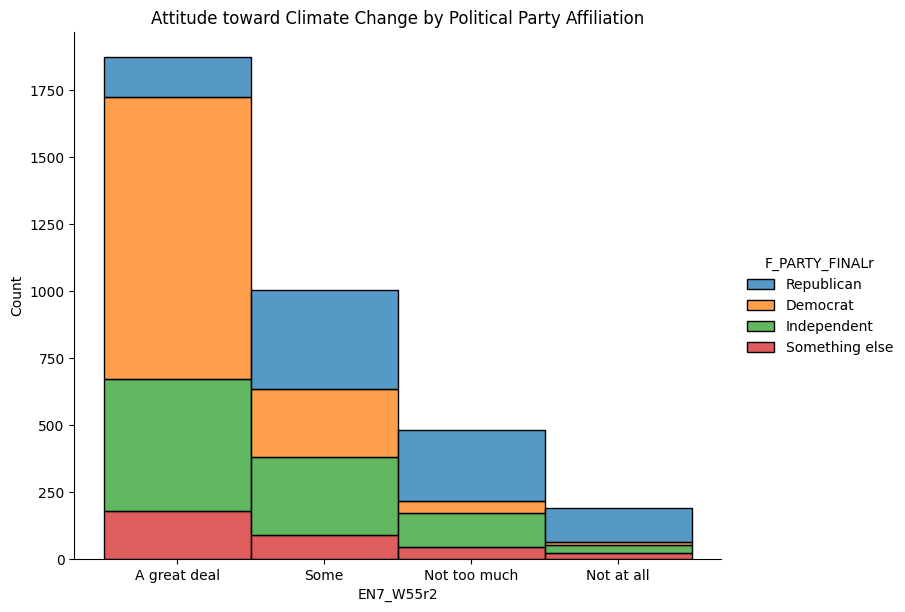

In [ ]:
p = sb.displot(ATPW55_df, x='EN7_W55r2', hue='F_PARTY_FINALr', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Climate Change by Political Party Affiliation')
plt.show()

# Now look at how beliefs in climate change are affected by gender

1.   First, handle missing data in the 'sex' variable by recoding 'Refused' as Nan




In [ ]:
# Handle missing var - if string contains 'Refused' recode it as NaN

ATPW55_df['F_SEXr'] = np.where(ATPW55_df['F_SEX'].str.contains('Refused'), np.nan, ATPW55_df['F_SEX'])
ATPW55_df['F_SEXr']

,F_SEXr
0,Male
1,Female
2,Female
3,Female
4,Female
...,...
3622,Male
3623,Female
3624,Female
3625,Female


## Create cross tab and sig tab

In [ ]:
# Code block 4b: More analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ATPW55_df.EN7_W55r2, ATPW55_df.F_SEXr, prop='col', test='chi-square')
crosstab


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


F_SEXr                
F_SEXr        Female    Male     All
EN7_W55r2                           
A great deal   54.57   50.64   52.75
Some           30.01   26.32   28.30
Not too much   11.32   16.33   13.64
Not at all      4.10    6.72    5.31
All           100.00  100.00  100.00

### Table Interpretation

**Cross tab**
- The order of beliefs are the same for both genders (great deal > some > not much > not at all)
- More females than males believe that humans cause a great deal of climate change (54.57% & 50.64%, respectively)
- More females than males believe that humans cause Ssome of climite change (30.01% & 26.32%, respectively)
- More males than females believe that humans cause not too much climate change (16.33% & 11.32%, respectively)
- More males than females believe that humans do not cause human change at all (6.72% & 4.10%, respectively)


**Sig tab**
- p = 0.000 - table is reliable - the patterns are due to real differences in beliefs by gender rather than random measurement error


In [ ]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,34.7516
1,p-value =,0.0000
2,Cramer's V =,0.0985


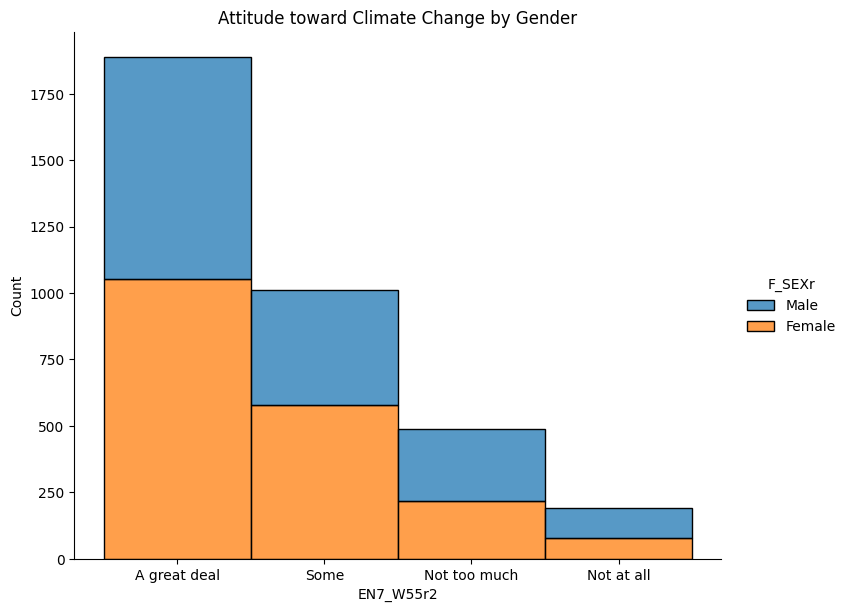

In [ ]:
p = sb.displot(ATPW55_df, x='EN7_W55r2', hue='F_SEXr', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Climate Change by Gender')
plt.show()

# Computing linear model without variables converting them to categoricals

- Read in SPSS file and add convert_categoricals=False to preserve the numeric variables (it's TRUE by default)

## **Do NOT convert categoricals if you want to run the linear model**

In [ ]:
# I'm going to read in some variables without converting them to categoricals in order to compute a linear model.

Climate_df = pd.read_spss('ATP W55.sav', usecols=['EN7_W55', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT', 'F_HISP', 'F_RACECMB', 'F_ATTEND', 'F_BORN', 'F_PARTY_FINAL', 'F_INCOME', 'F_IDEO'], convert_categoricals=False)

## Create **BINARY** variables to id demo characteristics to model
- Divide the survey question into 2 categories (yes/no)
- Create variable to describe the high category vs the low category
- Set the new variable to 0 and then switch it to 1 for some respondents
- Code below uses a more condensed version of the np.where statement
-- Where is an if/then question


In [ ]:
# Create some binary vectors to identify demographic characteristics to model.
# Divide the questions into categories - easier to read
# You can do this manually:

# Is the respondent young or not?
Climate_df['young'] = 0
Climate_df.loc[Climate_df['F_AGECAT'] == 1, ['young']] = 1

# Is respondent a woman?
Climate_df['women'] = 0
Climate_df.loc[Climate_df['F_SEX'] == 2, ['women']] = 1

# Does respondent have college degree?
Climate_df['college'] = 0
Climate_df.loc[Climate_df['F_EDUCCAT'] == 1, ['college']] = 1

# Is respondent black or not?
Climate_df['black'] = 0
Climate_df.loc[Climate_df['F_RACECMB'] == 2, ['black']] = 1

# Is respondent Latino or not?
Climate_df['latinx'] = 0
Climate_df.loc[Climate_df['F_HISP'] == 1, ['latinx']] = 1

# Is respondent a church goer or not?
Climate_df['churchgoer'] = 0
Climate_df.loc[Climate_df['F_ATTEND'] < 3, ['churchgoer']] = 1

# Is respondent born again or not?
Climate_df['bornagain'] = 0
Climate_df.loc[Climate_df['F_BORN'] == 1, ['bornagain']] = 1

# Is respondent a republican or not?
Climate_df['republican'] = 0
Climate_df.loc[Climate_df['F_PARTY_FINAL'] == 1, ['republican']] = 1

## Can create binaries using where
- Code is more efficient but harder to interpret
- Can create binaries using the code above (no where) or the code below (where) - don't need to do both

In [ ]:
# Or, you can use the where() method in the NumPy library to create a binary using
# a logical test, as I did above to code missing values.
# WHERE method
Climate_df['youngr'] = np.where(Climate_df['F_AGECAT'] == 1, 1, 0)

# This is more efficient code, but harder to read when you're learning Python

## Recode climate skepticism variable into binary
- Use where method or not

In [ ]:
# If value is greater than 4, then label as Nan - write this in 2 ways

# (1) No where method
Climate_df.loc[Climate_df['EN7_W55'] > 4, ['EN7_W55']] = np.nan

# (2) Use where method:
Climate_df['EN7_W55r'] = np.where(Climate_df['EN7_W55'] > 4, np.nan, Climate_df['EN7_W55'])

In [ ]:
# Linear model to predict belief in climate crisis
Y = Climate_df['EN7_W55'] # A higher score indicates more climate crisis skepticism
X = Climate_df[['young', 'women', 'college', 'black', 'latinx', 'churchgoer', 'bornagain', 'republican', 'F_INCOME', 'F_IDEO']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                EN7_W55   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.94e-218
Time:                        01:25:07   Log-Likelihood:                -4147.3
No. Observations:                3581   AIC:                             8317.
Df Residuals:                    3570   BIC:                             8385.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6187      0.029     56.306      0.0

In [ ]:
# This is the same model, with the recoded DV, showing the same results.
# Linear model to predict belief in climate crisis
Y = Climate_df['EN7_W55r'] # A higher score indicates more climate crisis skepticism
X = Climate_df[['young', 'women', 'college', 'black', 'latinx', 'churchgoer', 'bornagain', 'republican', 'F_INCOME', 'F_IDEO']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               EN7_W55r   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.94e-218
Time:                        01:25:32   Log-Likelihood:                -4147.3
No. Observations:                3581   AIC:                             8317.
Df Residuals:                    3570   BIC:                             8385.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6187      0.029     56.306      0.0

In [ ]:
Climate_df['skeptic'] = np.where(Climate_df['EN7_W55'] > 2, 1, 0)

In [ ]:
# Logistic model to predict belief in climate crisis
Y = Climate_df['skeptic'] # binary measure of belief in climate crisis
X = Climate_df[['young', 'women', 'college', 'black', 'latinx', 'churchgoer', 'bornagain', 'republican', 'F_INCOME', 'F_IDEO']]
X = sm.add_constant(X)
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.403239
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                skeptic   No. Observations:                 3627
Model:                          Logit   Df Residuals:                     3616
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1630
Time:                        01:25:37   Log-Likelihood:                -1462.5
converged:                       True   LL-Null:                       -1747.3
Covariance Type:            nonrobust   LLR p-value:                6.101e-116
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7109      0.103    -16.607      0.000      -1.913      -1.509
young         -0.3151      0.

In [ ]:
model2_marginals = model2.get_margeff(at='median')
print(model2_marginals.summary())

        Logit Marginal Effects       
Dep. Variable:                skeptic
Method:                          dydx
At:                            median
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
young         -0.0249      0.014     -1.831      0.067      -0.052       0.002
women         -0.0516      0.007     -7.919      0.000      -0.064      -0.039
college       -0.0502      0.010     -4.895      0.000      -0.070      -0.030
black         -0.0139      0.014     -1.030      0.303      -0.040       0.013
latinx        -0.0301      0.013     -2.244      0.025      -0.056      -0.004
churchgoer     0.0381      0.009      4.371      0.000       0.021       0.055
bornagain      0.0428      0.009      4.961      0.000       0.026       0.060
republican     0.1229      0.010     12.223      0.000       0.103       0.143
F_INCOME    4.448e-05      0.000      0.233      0.816    

## Activity

1. Download a data file from the Pew Center. Copy the file to your Drive and read it into a data object.
2. Create a crosstabulation and a visualization to depict the relationship between a demographic variable and an attitudinal variable.
3. Create a linear model to predict the attitudinal variable.
4. Interpret the results.